<div class='alert' style='background-color: #273333; color: #E5E7E8; padding:26px 26px; border-radius:15px; font-size:40px;'><B>Tesco Dataset</B> Exploration</div><span style='color: #273333; padding:26px 26px; font-size:11px;'> Powered by <B>AutoNote</B></span><div style='margin:4px 26px; color:#273333; font-size:17px;'>
</div>

In [4]:
# Importing default Libraries
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns
import warnings

pd.options.display.max_rows = 1000
pd.options.display.max_columns = 1000

# Hi-resolution Plots and Matplotlib inline
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# Set the maximum number of rows and columns to be displayed
warnings.filterwarnings('ignore')

# "magic commands" to enable autoreload of your imported packages
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
from tesco.params import *

In [15]:
data = pd.read_csv(f'{RAW_DATA}/train.csv')
data.head()

location_id  crime_rate  proportion_flats  proportion_nonretail new_store  \
0          464   17.600541               0.0                 18.10        no   
1          504    0.603556              20.0                  3.97        no   
2          295    0.606810               0.0                  6.20        no   
3          187    0.012385              55.0                  2.25        no   
4          193    0.016182             100.0                  1.32        no   

   commercial_property  household_size  proportion_newbuilds  \
0                  NaN           2.926                  29.0   
1                14.85           4.520                  10.6   
2                 7.70           2.981                  31.9   
3                 1.95           3.453                  68.1   
4                 3.05           3.816                  59.5   

   public_transport_dist     transport_availability  property_value  \
0                 2.9084      All transport options             666   
1                 2.1398  Average transport options             264   
2                 3.6715     Many transport options             307   
3                 7.3073       No transport options             300   
4                 8.3248  Average transport options             256   

   school_proximity  competitor_density  household_affluency  \
0              20.2              368.74               4.5325   
1              13.0              388.37               1.8150   
2              17.4              378.35               2.9125   
3              15.3              394.72               2.0575   
4              15.1              392.90               0.9875   

   normalised_sales county  
0         -0.399933   c_40  
1          2.216308   c_80  
2          0.166920   c_53  
3         -0.083804   c_65  
4          0.962693   c_97

In [16]:
data.shape

(320, 16)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   location_id             320 non-null    int64  
 1   crime_rate              320 non-null    float64
 2   proportion_flats        320 non-null    float64
 3   proportion_nonretail    320 non-null    float64
 4   new_store               320 non-null    object 
 5   commercial_property     291 non-null    float64
 6   household_size          320 non-null    float64
 7   proportion_newbuilds    320 non-null    float64
 8   public_transport_dist   320 non-null    float64
 9   transport_availability  320 non-null    object 
 10  property_value          320 non-null    int64  
 11  school_proximity        257 non-null    float64
 12  competitor_density      320 non-null    float64
 13  household_affluency     320 non-null    float64
 14  normalised_sales        320 non-null    fl

## Preprocessing

<B>Missing Values</B>

In [18]:
# Counting the number of NaN for each column
data.isnull().sum().sort_values(ascending=False)

school_proximity          63
commercial_property       29
location_id                0
crime_rate                 0
proportion_flats           0
proportion_nonretail       0
new_store                  0
household_size             0
proportion_newbuilds       0
public_transport_dist      0
transport_availability     0
property_value             0
competitor_density         0
household_affluency        0
normalised_sales           0
county                     0
dtype: int64

<B>Non-numeric Columns</b> - value_counts

In [19]:
# Perform value_couts() on all non-nummeric columns
my_list = data.select_dtypes(exclude=['number']).columns.tolist()

for i in my_list:
    print(f"Column Header: {i}")
    display(data[i].value_counts())

Column Header: new_store


no     301
yes     19
Name: new_store, dtype: int64

Column Header: transport_availability


All transport options        84
Average transport options    72
Few transport options        69
No transport options         53
Many transport options       42
Name: transport_availability, dtype: int64

Column Header: county


c_61     10
c_60     10
c_50     10
c_72      9
c_45      9
c_68      8
c_48      8
c_62      7
c_39      7
c_63      7
c_69      7
c_64      6
c_52      6
c_70      6
c_59      6
c_57      6
c_73      6
c_49      5
c_42      5
c_74      5
c_94      5
c_41      5
c_35      5
c_83      5
c_44      5
c_71      5
c_38      5
c_25      4
c_46      4
c_80      4
c_23      4
c_77      4
c_67      4
c_53      4
c_54      4
c_55      4
c_66      4
c_78      3
c_26      3
c_65      3
c_84      3
c_76      3
c_56      3
c_27      3
c_58      3
c_82      3
c_29      3
c_24      2
c_128     2
c_28      2
c_93      2
c_92      2
c_37      2
c_34      2
c_30      2
c_116     2
c_40      2
c_43      2
c_90      2
c_31      2
c_51      2
c_47      2
c_98      2
c_36      2
c_95      2
c_81      2
c_85      2
c_75      2
c_133     1
c_112     1
c_21      1
c_32      1
c_123     1
c_91      1
c_122     1
c_0       1
c_110     1
c_79      1
c_114     1
c_15      1
c_33      1
c_20      1
c_137     1
c_97

## Stats & Correlation

In [20]:
data.describe().T.round(3)

count     mean      std      min      25%      50%  \
location_id            320.0  252.388  145.601    1.000  126.500  251.500   
crime_rate             320.0    3.596    7.176    0.007    0.088    0.290   
proportion_flats       320.0   10.673   22.579    0.000    0.000    0.000   
proportion_nonretail   320.0   11.308    7.033    0.740    5.130    9.900   
commercial_property    291.0   16.869   73.806    1.750    5.450    9.400   
household_size         320.0    3.253    0.695    0.561    2.880    3.198   
proportion_newbuilds   320.0   31.849   27.846    0.000    6.350   23.400   
public_transport_dist  320.0    3.719    1.985    1.137    2.138    3.096   
property_value         320.0  408.834  170.889  188.000  277.000  330.000   
school_proximity       257.0   18.589    2.076   13.000   17.400   19.100   
competitor_density     320.0  359.658   86.049    3.500  376.722  392.205   
household_affluency    320.0    3.144    1.774    0.432    1.804    2.809   
normalised_sales       320.0   -0.017    0.979   -1.937   -0.585   -0.144   

                           75%       max  
location_id            377.250   506.000  
crime_rate               4.064    51.693  
proportion_flats        12.500   100.000  
proportion_nonretail    18.100    27.740  
commercial_property     14.050  1009.000  
household_size           3.597     5.725  
proportion_newbuilds    54.450    94.000  
public_transport_dist    5.117    10.710  
property_value         666.000   711.000  
school_proximity        20.200    21.200  
competitor_density     396.352   396.900  
household_affluency      4.092     9.492  
normalised_sales         0.243     2.968

Seaborn <b>Pairplot</B>

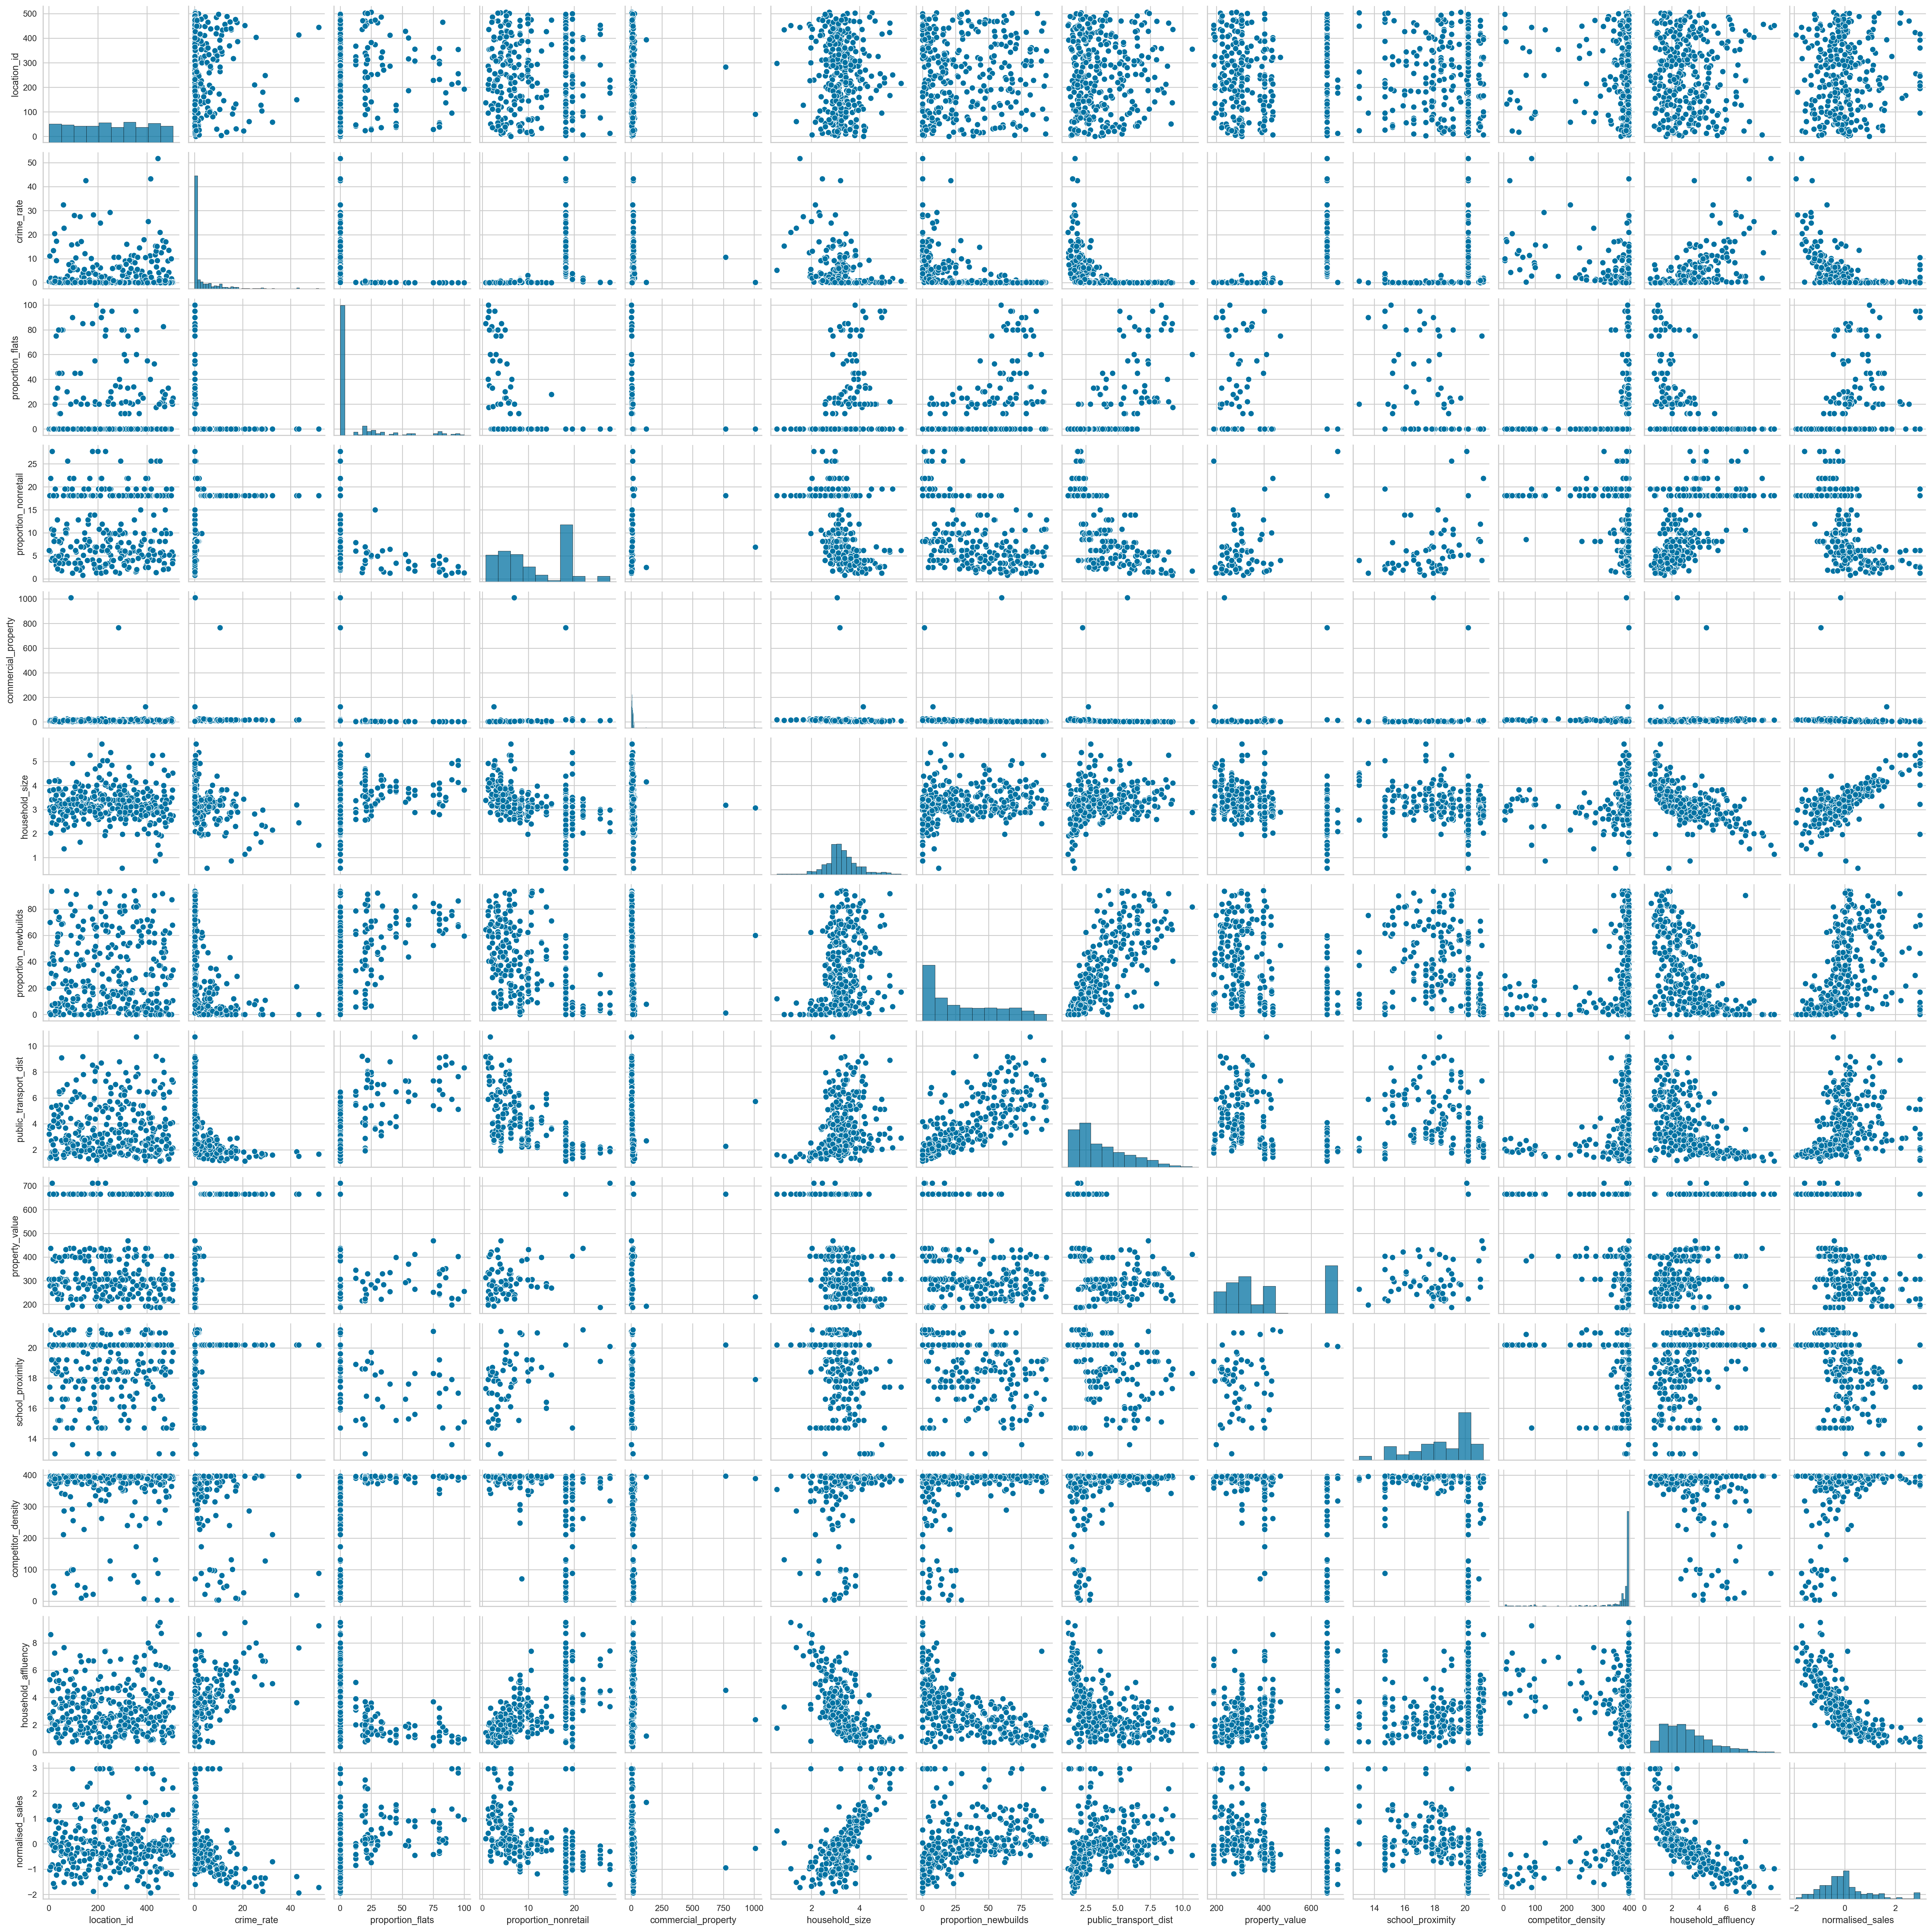

In [21]:
# sns.pairplot to explore numberic data correlation & outliers.
sns.pairplot(data);

<B>Correlation</B> & Heatmap

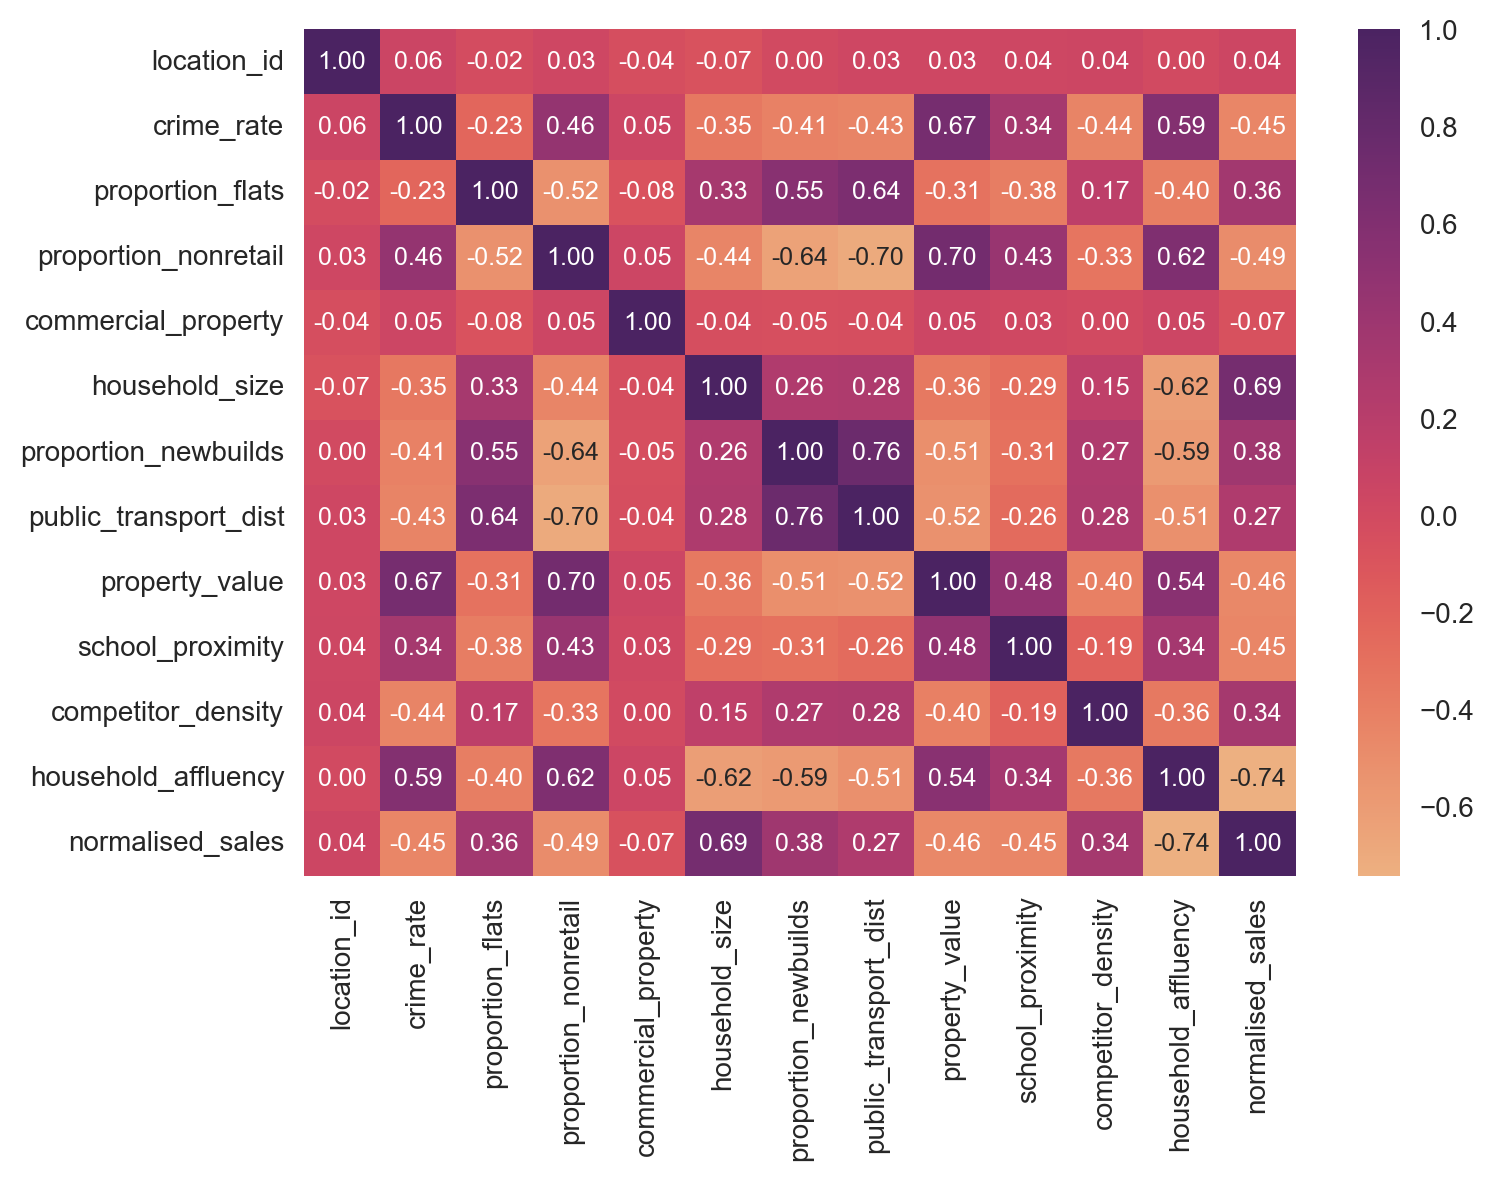

In [23]:
# sns.heatmap cmap options flare (red/purple), crest (blue), other, other
sns.heatmap(data.corr(), annot=True, annot_kws={'size': 9}, fmt='.2f', cmap='flare');

<Axes: >

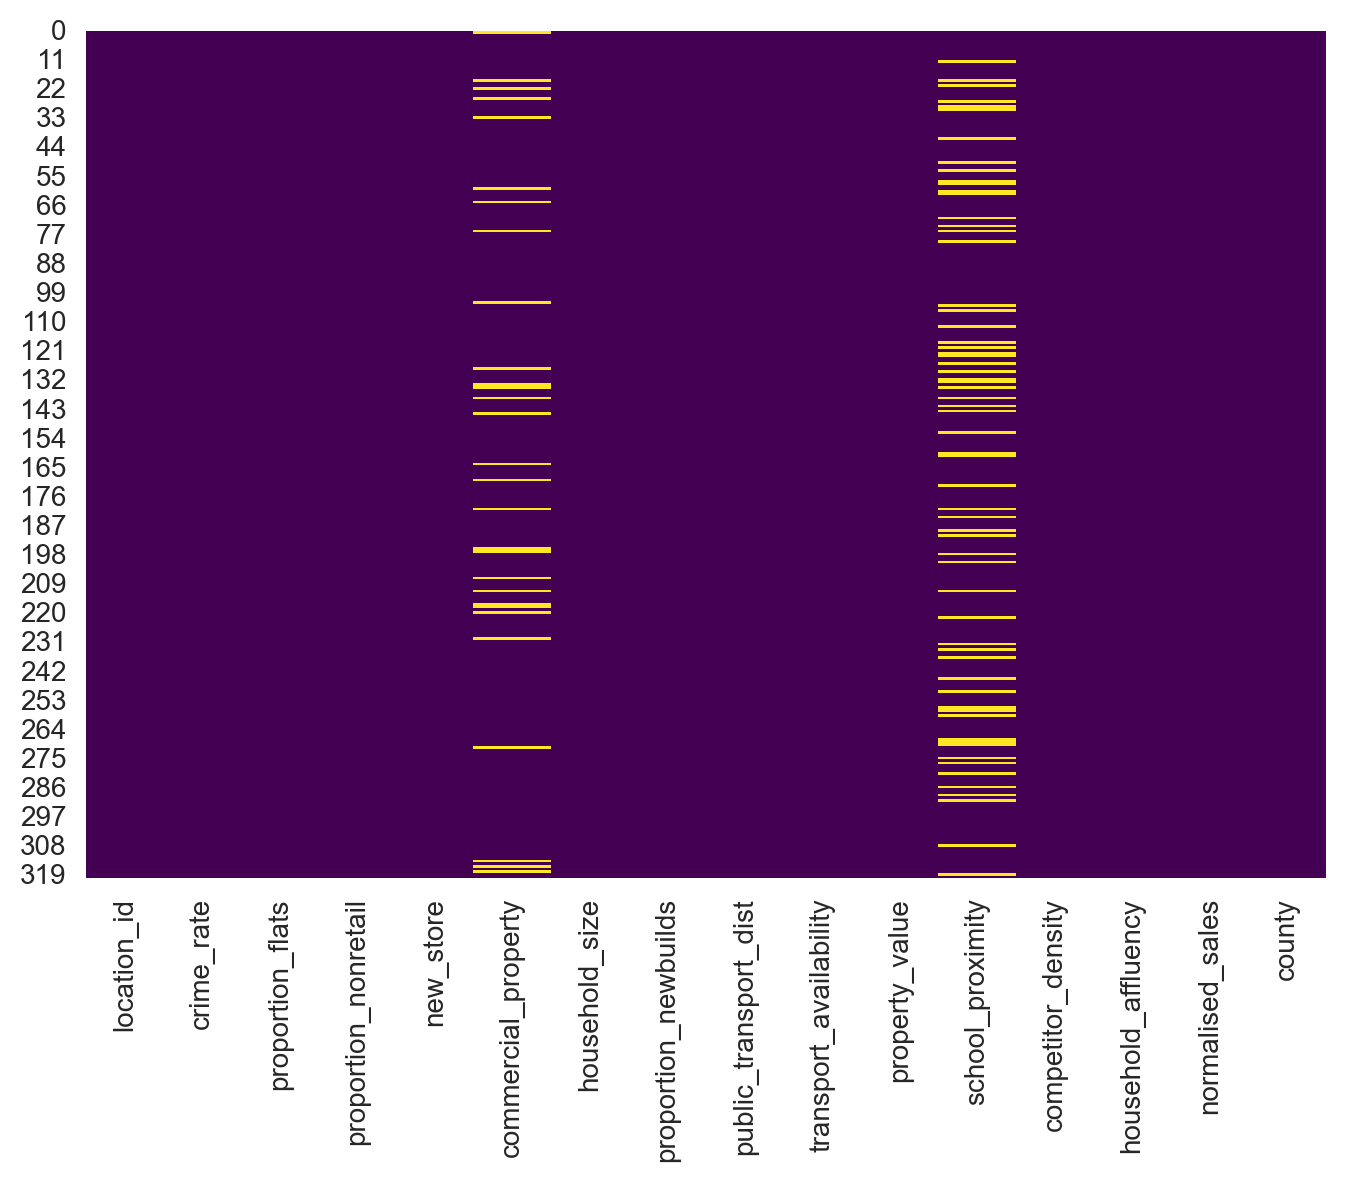

In [25]:
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')

In [12]:
from autonote import AutoNote
an = AutoNote()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

OperationalError: 2055: Lost connection to MySQL server at 'sql8.freesqldatabase.com:3306', system error: 54 Connection reset by peer

<IPython.core.display.Javascript object>